In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [2]:
senate = pd.read_csv('Data for Finance Final Project - Senate Dataset.csv')
stocks = pd.read_csv('Data for Finance Final Project - Stock Financial Data.csv')
stock_sector = pd.read_csv('Data for Finance Final Project - Stock Sector Data.csv')
senate_stock = pd.read_csv('Data for Finance Final Project - updated senate dataset with stock info.csv')

In [3]:
senate

,senator,party,sex,trade_date,owner,ticker,type,trade_amount_max,trade_amount_min,buy_one_year_change,one_mo_vtsax_change,one_year_vtsax_change,buy_compare_one_year,one_month_sell,one_month_sell_compare,weight
0,Thomas Carper,1.0,1,29Jan2021,Spouse,XCAPX,Purchase,50000.0,15000.0,NaN,0.031875,NaN,NaN,NaN,NaN,4.06
1,Patrick Toomey,0.0,1,28Jan2021,Child,GME,Sale,15000.0,1000.0,NaN,0.016324,NaN,NaN,-0.438378,-0.454702,1.00
2,Jerry Moran,0.0,1,27Jan2021,Spouse,COST,Sale,15000.0,1000.0,NaN,0.054616,NaN,NaN,-0.044025,-0.098641,1.00
3,Jerry Moran,0.0,1,27Jan2021,Self,COST,Sale,15000.0,1000.0,NaN,0.054616,NaN,NaN,-0.044025,-0.098641,1.00
4,Patrick Toomey,0.0,1,27Jan2021,Child,SHOP,Sale,15000.0,1000.0,NaN,0.054616,NaN,NaN,0.191442,0.136826,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260,Thomas Carper,1.0,1,17Dec2012,Spouse,DD,Purchase,15000.0,1000.0,NaN,0.026470,0.262190,NaN,NaN,NaN,1.00
8261,Lamar Alexander,0.0,1,01Nov2012,Spouse,--,Sale,100000.0,50000.0,NaN,-0.004770,0.246914,NaN,NaN,NaN,9.38
8262,Lamar Alexander,0.0,1,24Oct2012,Spouse,--,Purchase,100000.0,50000.0,NaN,-0.009399,0.260894,NaN,NaN,NaN,9.38
8263,Thomas Carper,1.0,1,13Sep2012,Spouse,DD,Purchase,15000.0,1000.0,NaN,-0.023536,0.168309,NaN,NaN,NaN,1.00


In [4]:
# senate.head()

# stocks.head()

# senate_stock.head()

In [5]:
senate = senate[['senator', 'trade_date', 'party', 'owner', 'ticker', 'type', 'trade_amount_max', 'trade_amount_min']]
senate['trade_date'] = senate['trade_date'].apply(lambda x: datetime.strptime(x, '%d%b%Y'))

/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_42579/27706108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senate['trade_date'] = senate['trade_date'].apply(lambda x: datetime.strptime(x, '%d%b%Y'))


In [6]:
senate.groupby('senator').apply(len).sort_values(ascending=False)

senator
David Perdue            2597
Thomas Carper            892
Sheldon Whitehouse       670
Pat Roberts              459
Susan Collins            387
Shelley Capito           357
Kelly Loeffler           279
John Reed                240
James Inhofe             230
Ron Wyden                221
John Hoeven              213
Patrick Toomey           192
William Cassidy          166
Patty Murray             161
Rick Scott               146
Jerry Moran              138
Gary Peters              136
Richard Burr             118
Thomas Tillis             99
Angus King                74
Mark Warner               73
Lamar Alexander           59
Richard Blumenthal        46
John Boozman              43
Dianne Feinstein          29
Daniel Sullivan           26
Christopher Coons         23
Tina Smith                23
Tammy Duckworth           19
A. MitchellMcconnell      18
Benjamin Cardin           15
Cory Booker               13
Joseph ManchinIii         12
Rafael Cruz               10
Mike R

In [7]:
# -- wealthiest
# Rick Scott
# Mark Warner

# -- most active
# David Perdue            
# Thomas Carper            
# Sheldon Whitehouse

In [8]:
wealthiest = ['Rick Scott', 'Mark Warner']
active = ['David Perdue', 'Thomas Carper', 'Sheldon Whitehouse']

names = ['Rick Scott', 'Mark Warner', 'David Perdue', 'Thomas Carper', 'Sheldon Whitehouse']

In [9]:
senate = senate.dropna()
senate['type'] = senate['type'].map({'Purchase': 'buy', 'Sale': 'sell'})
senate = senate.set_index('trade_date')
senate = senate.sort_index(ascending=True)

In [10]:
senate['amount_avg'] = (senate['trade_amount_max'] + senate['trade_amount_min'])/2

In [11]:
wealth_sen = senate[senate['senator'].isin(wealthiest)].reset_index(drop=True)
active_sen = senate[senate['senator'].isin(active)].reset_index(drop=True)

In [12]:
# rick = senate[senate['senator'] == names[0]]

# rick['type'] = rick['type'].map({'Purchase': 'buy', 'Sale': 'sell'})

# rick = rick.set_index('trade_date')

# rick = rick.sort_index(ascending=True)

In [13]:
# rick[rick['type'] == 'buy'].index
# rick[rick['type'] == 'sell'].index

In [14]:
def getYahooData(ticker, start, end, interval='1d'):
    # Download the ticker prices
    data = yf.download(ticker, start=start, end=end, interval=interval) 
    # Set the index to a datetime type
    data.index = pd.to_datetime(data.index)
    
    return data

In [15]:
def plotSenTrades(ticker_data, senator, name):
    senator = senator[senator['senator'] == name]
    start = min(senator.index)
    end = max(senator.index)
    
    ticker_data = ticker_data[start:end]
    
#     ticker_data = data[data['senator'] == name]
    plt.plot(senator[senator['type'] == 'buy'].index,
         ticker_data.loc[senator[senator['type'] == 'buy'].index,:]['Adj Close'],  
         '^', markersize=10, color='g')
    plt.plot(senator[senator['type'] == 'sell'].index,
             ticker_data.loc[senator[senator['type'] == 'sell'].index,:]['Adj Close'], 
             'v', markersize=10, color='r')
    ticker_data['Adj Close'].plot(figsize=(20,8))

In [16]:
vtsax_data = getYahooData("VTSAX", min(senate.index), max(senate.index), interval='1d')
spy_data = getYahooData("^GSPC", min(senate.index), max(senate.index), interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


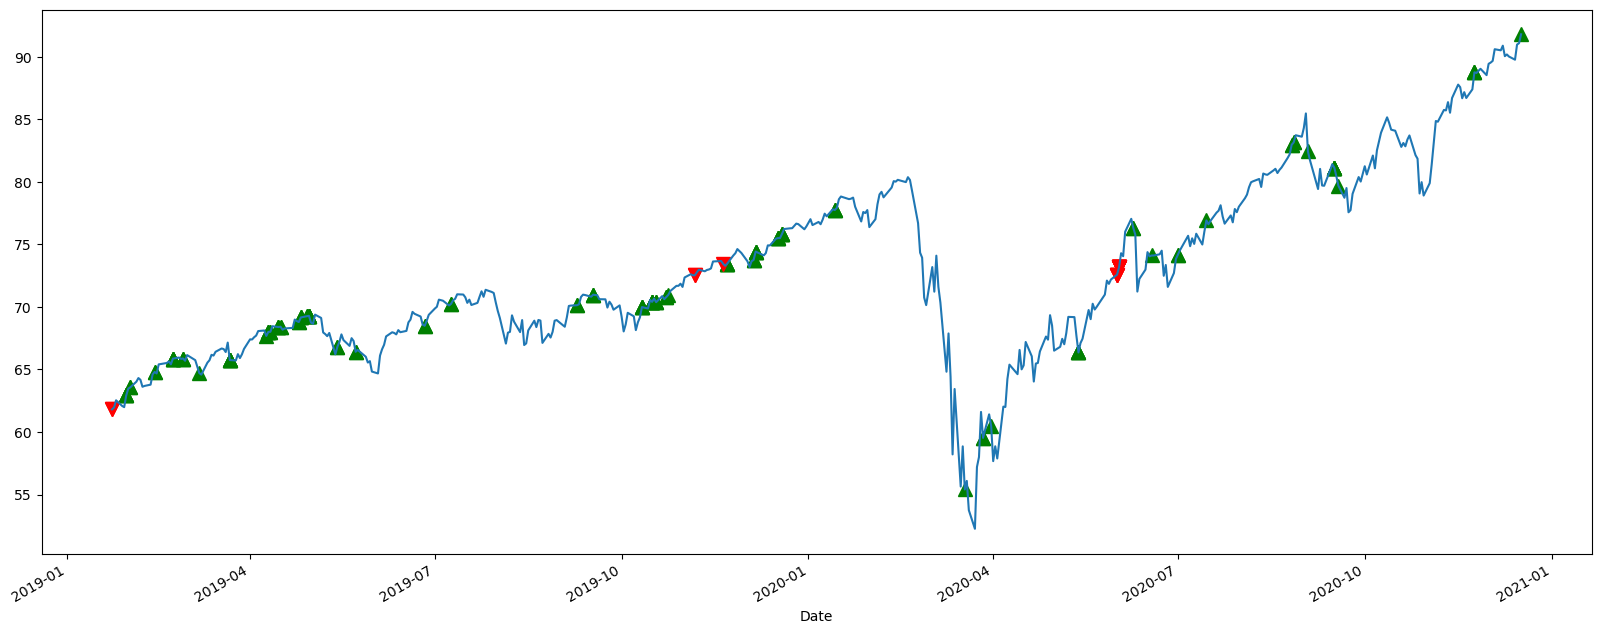

In [17]:
plotSenTrades(vtsax_data, senate, wealthiest[0])

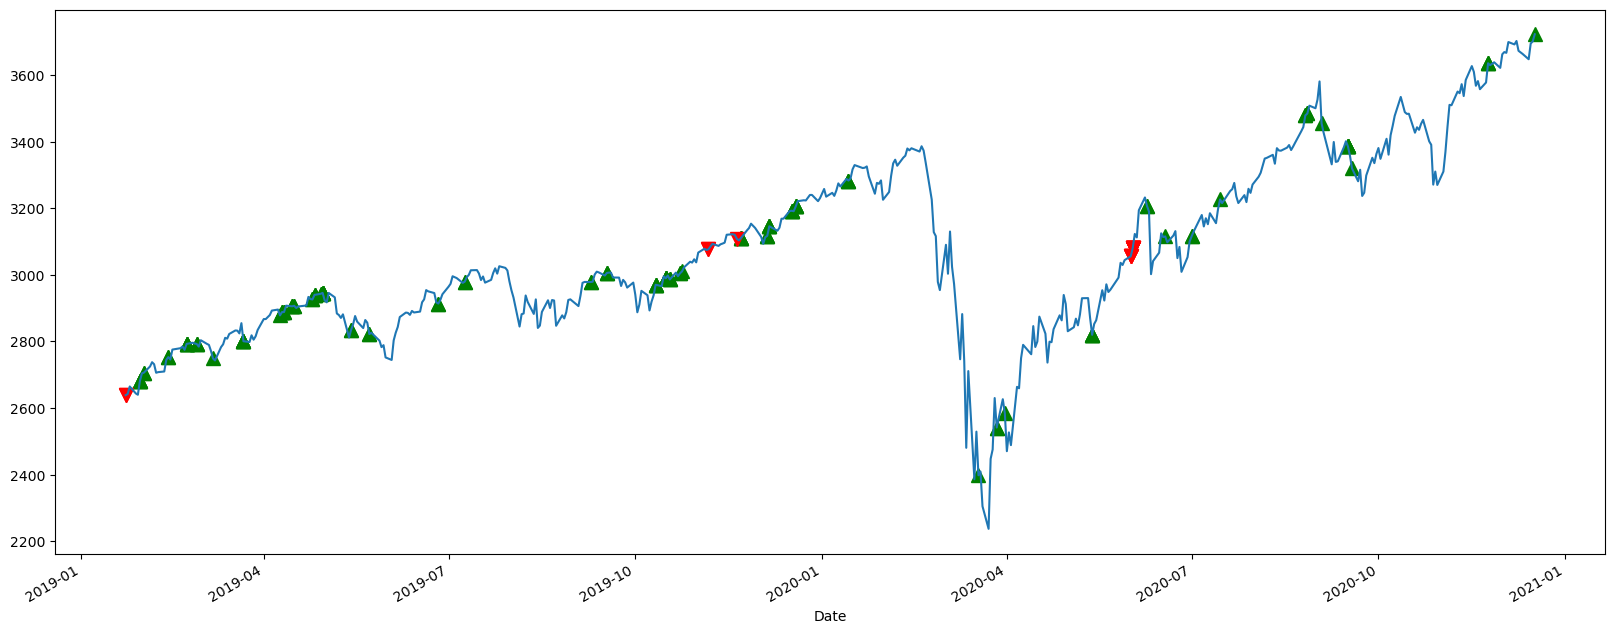

In [18]:
plotSenTrades(spy_data, senate, wealthiest[0])

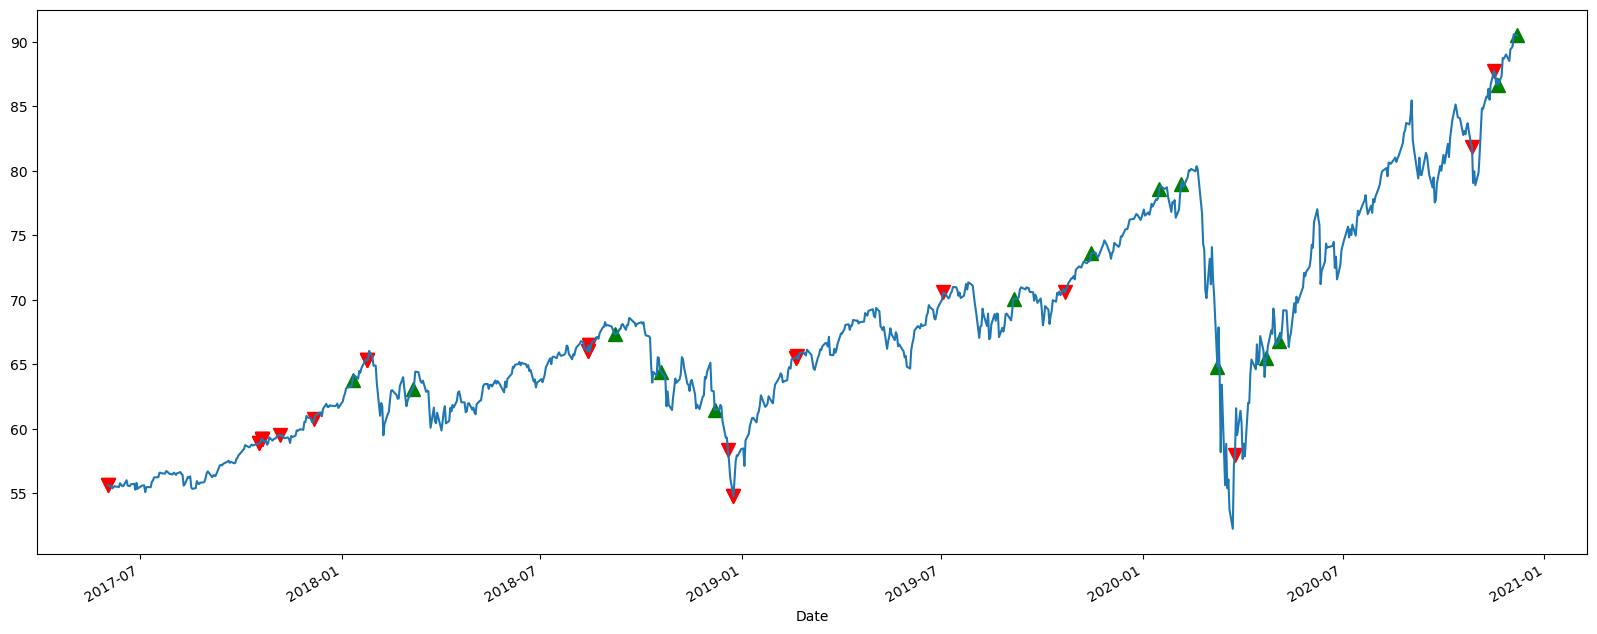

In [19]:
plotSenTrades(vtsax_data, senate, wealthiest[1])

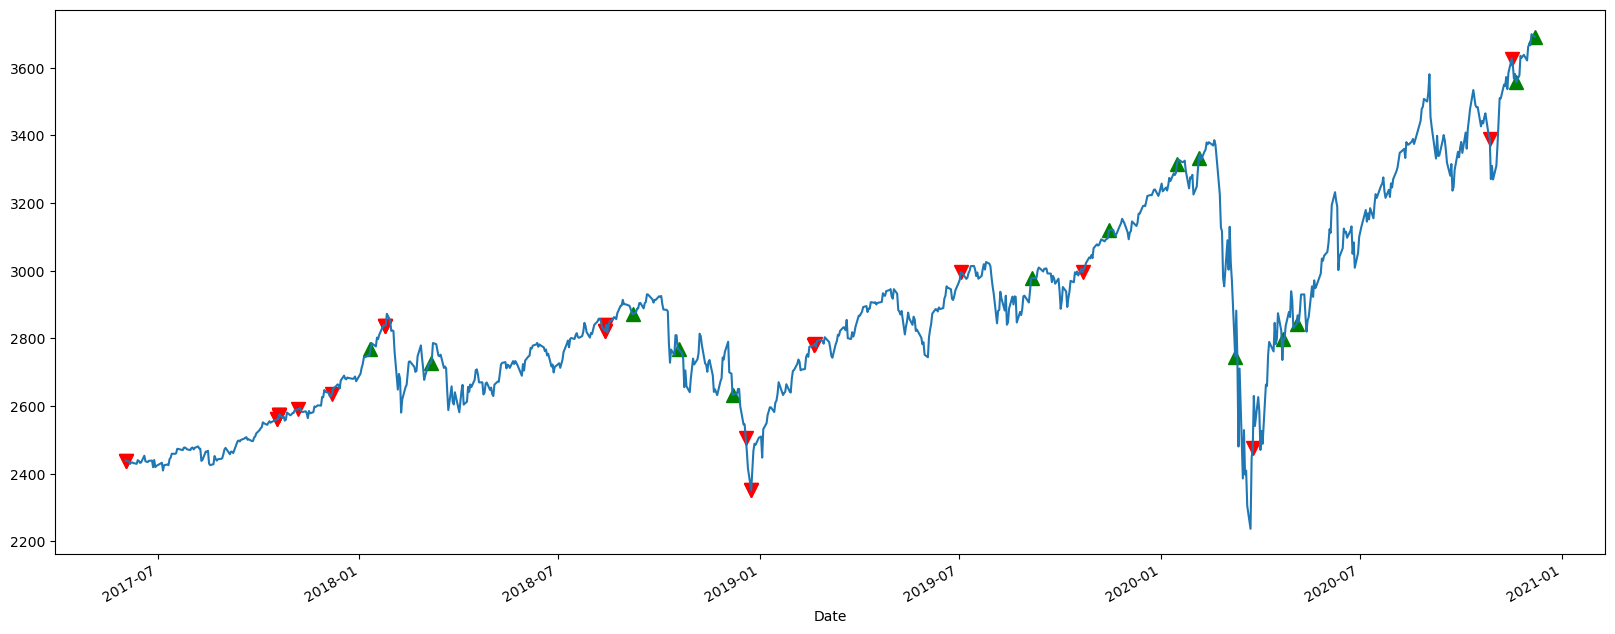

In [20]:
plotSenTrades(spy_data, senate, wealthiest[1])

In [25]:
ticker = senate.reset_index()

In [26]:
ticker = ticker[ticker['ticker'] != '--']

In [28]:
ticker = pd.DataFrame(ticker.groupby(['trade_date', 'ticker', 'type'])['senator'].count()).reset_index()

In [29]:
top50_stocks = pd.DataFrame(ticker.groupby(['ticker'])['senator'].count()).reset_index().sort_values('senator').iloc[-50:]

In [30]:
top50_stocks

,ticker,senator
441,IBM,25
801,SLB,25
215,COST,26
133,BMY,26
56,AMGN,27
283,DVN,27
93,AXTA,27
681,PEP,28
503,KN,28
746,RF,28


In [31]:
ticker = ticker.sort_values('trade_date').set_index('trade_date')

In [32]:
def plotTickerTrades(market_data, ticker, name):
    ticker = ticker[ticker['ticker'] == name]
    start = min(ticker.index)
    end = max(ticker.index)
    
    market_data = market_data[start:end]
    
#     ticker_data = data[data['senator'] == name]
    plt.plot(ticker[ticker['type'] == 'buy'].index,
         market_data.loc[ticker[ticker['type'] == 'buy'].index,:]['Adj Close'],  
         '^', markersize=10, color='g')
    plt.plot(ticker[ticker['type'] == 'sell'].index,
             market_data.loc[ticker[ticker['type'] == 'sell'].index,:]['Adj Close'], 
             'v', markersize=10, color='r')
    market_data['Adj Close'].plot(figsize=(20,8))

In [33]:
getYahooData("AAPL", min(ticker.index), max(ticker.index), interval='1d')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-13,24.191786,24.482143,24.098928,24.392143,20.881575,598360000
2012-09-14,24.641430,24.892143,24.567499,24.688572,21.135334,600474000
2012-09-17,24.976786,24.992857,24.807501,24.992144,21.395218,398031200
2012-09-18,24.995714,25.083214,24.872143,25.068214,21.460342,373503200
2012-09-19,25.009287,25.142500,24.984644,25.075001,21.466148,326874800
...,...,...,...,...,...,...
2021-01-22,136.279999,139.850006,135.020004,139.070007,137.420364,114459400
2021-01-25,143.070007,145.089996,136.539993,142.919998,141.224701,157611700
2021-01-26,143.600006,144.300003,141.369995,143.160004,141.461868,98390600


In [34]:
aapl_data = getYahooData("AAPL", min(ticker.index), max(ticker.index), interval='1d')
nflx_data = getYahooData("NFLX", min(senate.index), max(senate.index), interval='1d')
bac_data = getYahooData("BAC", min(senate.index), max(senate.index), interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


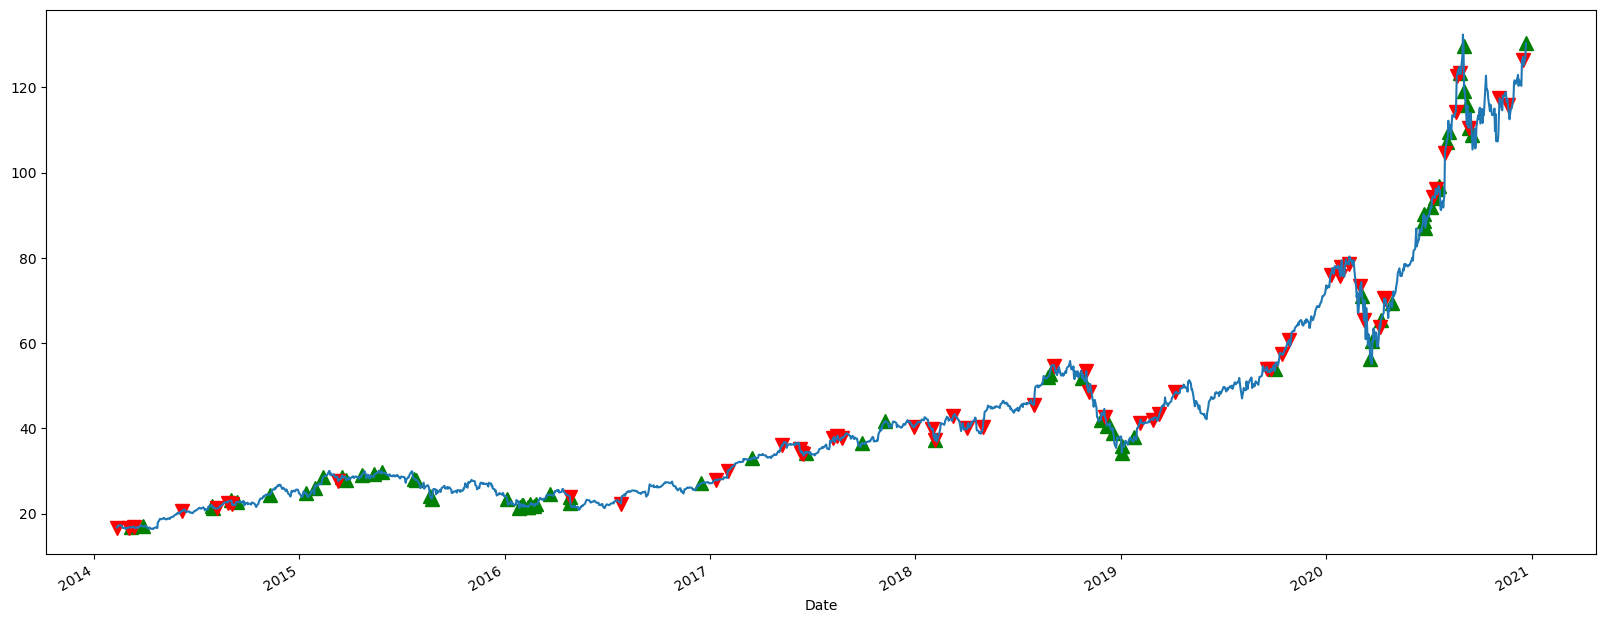

In [35]:
plotTickerTrades(aapl_data, ticker, 'AAPL')

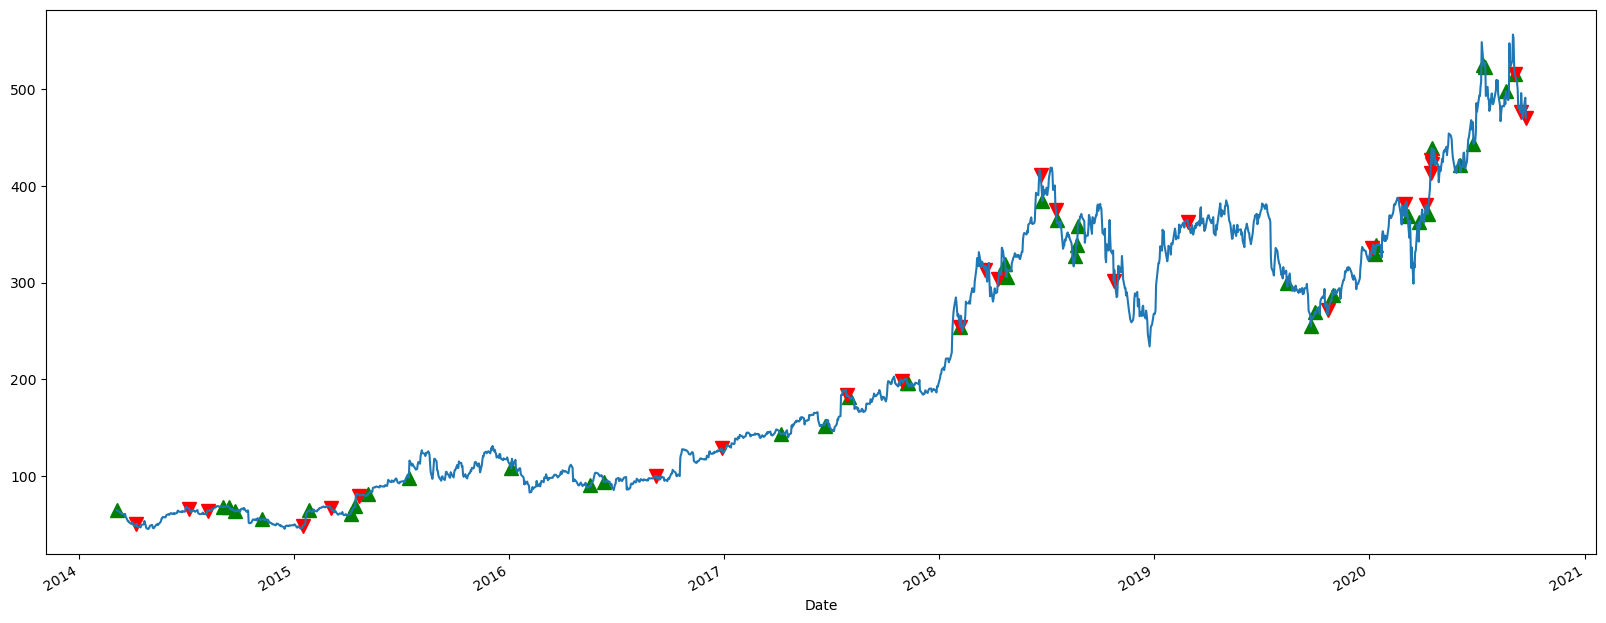

In [36]:
plotTickerTrades(nflx_data, ticker, 'NFLX')

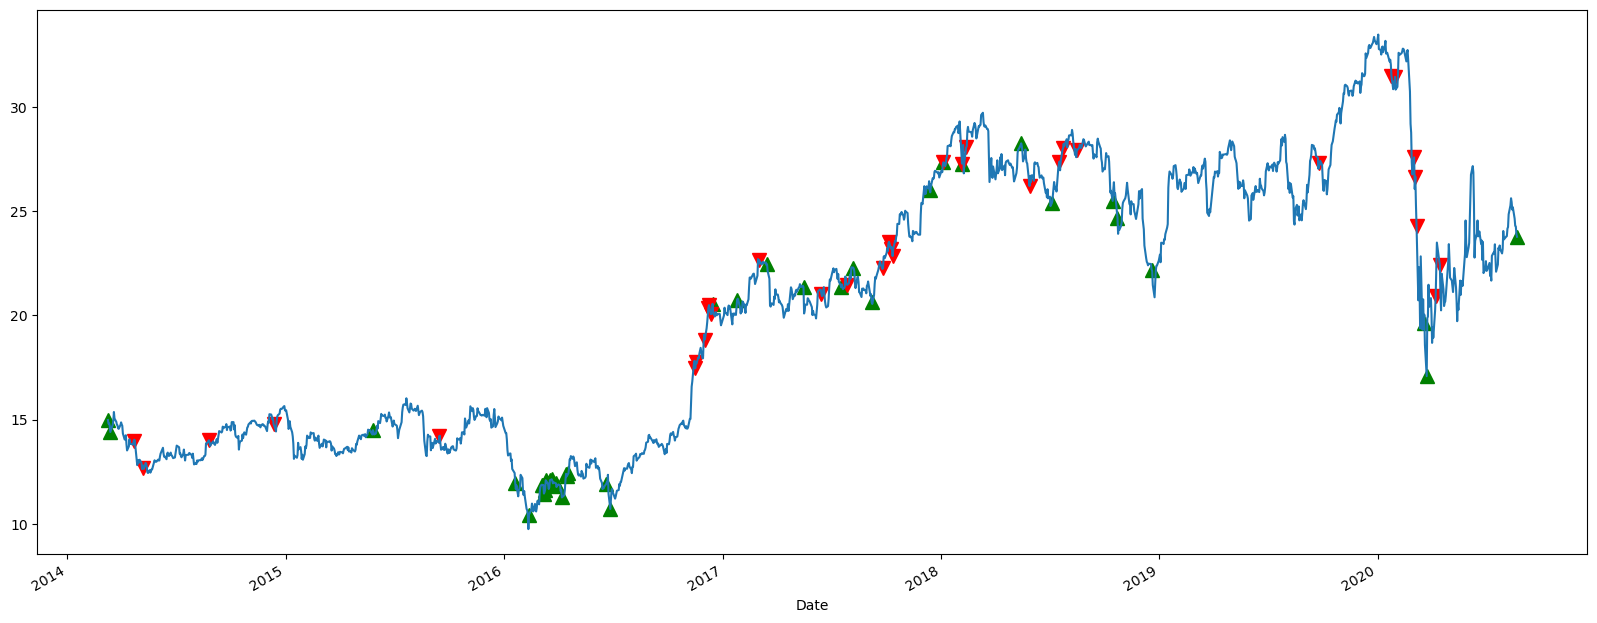

In [37]:
plotTickerTrades(bac_data, ticker, 'BAC')

## NMF on ETFs and sectors

In [38]:
from sklearn.decomposition import NMF

In [39]:
spy_data = getYahooData("SPY", min(ticker.index), max(ticker.index), interval='1d')
vti_data = getYahooData("VTI", min(ticker.index), max(ticker.index), interval='1d')
qqq_data = getYahooData("QQQ", min(ticker.index), max(ticker.index), interval='1d')
vtv_data = getYahooData("VTV", min(ticker.index), max(ticker.index), interval='1d')
vug_data = getYahooData("VUG", min(ticker.index), max(ticker.index), interval='1d')
schd_data = getYahooData("SCHD", min(ticker.index), max(ticker.index), interval='1d')
dia_data = getYahooData("DIA", min(ticker.index), max(ticker.index), interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
# sectors
xlv_data = getYahooData("XLV", min(ticker.index), max(ticker.index), interval='1d') # health
vgt_data = getYahooData("VGT", min(ticker.index), max(ticker.index), interval='1d') # tech
xlf_data = getYahooData("XLF", min(ticker.index), max(ticker.index), interval='1d') # finance

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [41]:
etfs = pd.concat([spy_data[['Adj Close']], 
                  vti_data[['Adj Close']], 
                  qqq_data[['Adj Close']], 
                  vtv_data[['Adj Close']],
                  vug_data[['Adj Close']], 
                  schd_data[['Adj Close']], 
                  dia_data[['Adj Close']]],
                 axis=1, 
                 keys=['SPY', 'VTI', 'QQQ', 'VTV', 'VUG', 'SCHD', 'DIA'])

In [42]:
sectors = pd.concat([xlv_data[['Adj Close']], 
                       vgt_data[['Adj Close']], 
                       xlf_data[['Adj Close']]],
                      axis=1, 
                      keys=['XLV', 'VGT', 'XLF'])

In [43]:
model_etfs = NMF(n_components=3, init='random', beta_loss='frobenius', random_state=0, max_iter=10000)
W_etfs = model_etfs.fit_transform(etfs.fillna(0).values)
H_etfs = model_etfs.components_

In [44]:
# model_etfs_sparse = NMF(n_components=3, init='nndsvd', beta_loss='frobenius', random_state=0, max_iter=10000)
# W_etfs_sparse = model_etfs_sparse.fit_transform(etfs.fillna(0).values)
# H_etfs_sparse = model_etfs_sparse.components_

In [45]:
df_W = pd.DataFrame(W_etfs, index=etfs.index, columns=['C1', 'C2', 'C3'])

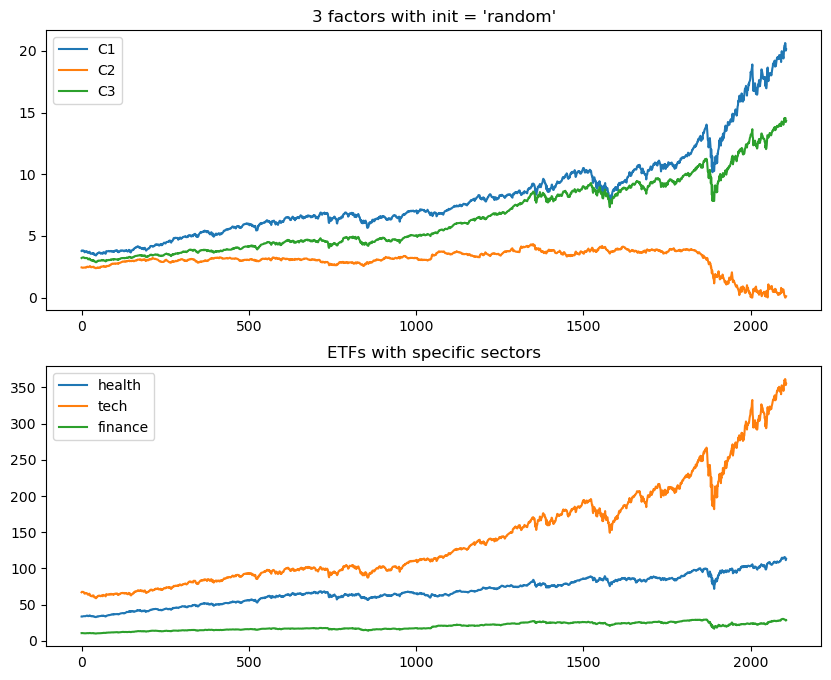

In [46]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)

plt.title("3 factors with init = 'random'")
plt.plot(W_etfs[:,0], label='C1')
plt.plot(W_etfs[:,1], label='C2')
plt.plot(W_etfs[:,2], label='C3')
plt.legend()

plt.subplot(2, 1, 2)

plt.title("ETFs with specific sectors")
plt.plot(sectors.values[:,0], label='health')
plt.plot(sectors.values[:,1], label='tech')
plt.plot(sectors.values[:,2], label='finance')
plt.legend()

In [47]:
senator = senate[senate['senator'] == wealthiest[0]]

<AxesSubplot:xlabel='Date'>

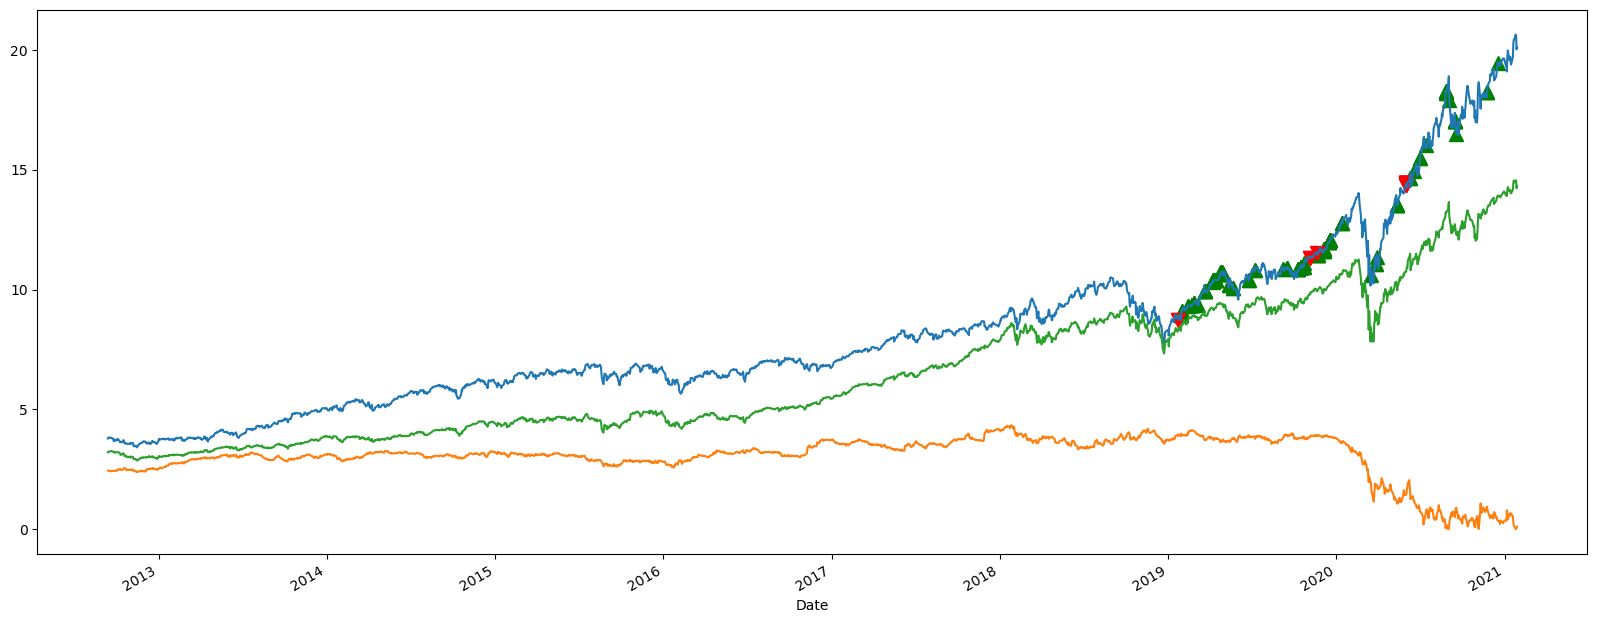

In [48]:
# senator by and sell with components on ETFs
plt.plot(senator[senator['type'] == 'buy'].index,
         df_W.loc[senator[senator['type'] == 'buy'].index,:]['C1'],  
         '^', markersize=10, color='g')
plt.plot(senator[senator['type'] == 'sell'].index,
         df_W.loc[senator[senator['type'] == 'sell'].index,:]['C1'], 
         'v', markersize=10, color='r')
df_W['C1'].plot(figsize=(20,8))
df_W['C2'].plot(figsize=(20,8))
df_W['C3'].plot(figsize=(20,8))

In [50]:
tickers = senate[senate['ticker'] != '--']['ticker'].unique()

In [52]:
senate['ticker'] = np.where(senate['ticker']=='FB', 'META', senate['ticker'])

In [53]:
senate.groupby('senator')['ticker'].nunique().sort_values()

senator
Michael Crapo             1
John Cornyn               1
John Barrasso             1
Mike Rounds               1
Jeanne Shaheen            1
Maria Cantwell            1
Robert Casey              1
Robert Portman            1
Rick Scott                1
Ron Johnson               1
Steve Daines              1
Diane Feinstein           1
Lamar Alexander           1
Thomas Udall              2
Michael Enzi              2
John Kennedy              2
Joseph ManchinIii         2
Roger Wicker              3
Roy Blunt                 3
Timothy Kaine             3
Michael Bennet            3
A. MitchellMcconnell      4
Benjamin Cardin           4
Christopher Coons         4
Jacklyn Rosen             5
Mark Warner               6
Chris VanHollen           6
Rafael Cruz               6
Tina Smith               10
Cory Booker              10
Daniel Sullivan          13
Tammy Duckworth          17
Richard Burr             21
Gary Peters              35
Jerry Moran              39
Ron Wyden   

## NMF on senate stocks

In [54]:
from yahooquery import Ticker

In [55]:
agg_senate_stocks = pd.read_csv('aggregate_stocks_prices_nnmf.csv')

In [56]:
agg_senate_stocks.tail()

,date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,WY,WYNN,XEL,XLEFF,XOM,XYL,YUM,ZBH,ZION,ZTS
13317,2022-12-05,115.724380,15.49,205.254501,142.362244,151.320419,150.680908,234.350006,106.987404,278.972717,...,37.841824,58.560001,72.550545,0.18683,85.469559,82.216026,109.428505,112.593025,52.740700,162.781265
13318,2022-12-07,119.033989,14.77,182.218262,145.657669,149.525650,140.941238,256.260010,107.314400,271.492706,...,34.427628,54.730000,69.048271,0.19230,83.686874,76.527847,115.264832,102.800041,49.851093,173.491608
13319,2022-12-08,133.319275,15.25,200.743393,172.100006,141.163605,150.500000,293.589996,110.956467,319.021332,...,36.695614,68.739998,75.466278,0.17937,94.000000,103.040489,117.583466,116.958374,57.815353,175.669998
13320,2022-12-09,139.628342,14.47,179.889008,163.429993,140.807236,147.710007,279.160004,108.776749,293.952820,...,34.560001,64.510002,76.906860,0.17800,97.610001,97.599998,117.260002,119.003792,58.619999,166.350006
13321,2022-12-10,125.690002,12.70,169.320007,138.339996,138.569992,138.940002,242.770004,99.610001,250.070007,...,29.389999,58.709999,57.939999,0.16500,98.430000,87.220001,105.540001,107.059998,48.439999,145.860001


In [57]:
nasdaq = pd.read_csv('nasdaq_screener_1669854569804.csv')['Symbol']
nyse = pd.read_csv('nasdaq_screener_1669854659250.csv')['Symbol']

In [58]:
symbols = nasdaq.append(nyse, ignore_index=True).unique()

/var/folders/6f/dgvrwwq158b46jqfnftpff2r0000gn/T/ipykernel_42579/2018917281.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  symbols = nasdaq.append(nyse, ignore_index=True).unique()


In [59]:
download = [i for i in tickers if i in symbols]

download = download + ['META']

delisted = [i for i in tickers if i not in symbols]

In [60]:
# Initialize Ticker
tickers_download = Ticker(download, asynchronous=True, retry=20, status_forcelist=[404, 429, 500, 502, 503, 504],
                 period='max')

In [61]:
%%time
df = tickers_download.history(period = 'max')

CPU times: user 12.6 s, sys: 1.63 s, total: 14.2 s
Wall time: 25.1 s


In [62]:
# with 3 indices
df

low      volume       close        high        open  \
symbol date                                                                     
DD     1972-06-01    7.254722     74617.0    7.274490    7.294257    0.000000   
       1972-06-02    7.294257    227645.0    7.353560    7.393096    7.294257   
       1972-06-05    7.333793     96117.0    7.333793    7.363444    7.353560   
       1972-06-06    7.294257     77146.0    7.314025    7.343677    7.333793   
       1972-06-07    7.185535    121411.0    7.185535    7.284374    7.284374   
...                       ...         ...         ...         ...         ...   
META   2022-11-23  110.730003  21343100.0  112.239998  112.669998  111.720001   
       2022-11-25  111.019997  12007600.0  111.410004  112.730003  111.300003   
       2022-11-28  108.379997  23309400.0  108.779999  112.040001  110.779999   
       2022-11-29  108.540001  23899200.0  109.459999  110.940002  109.540001   
       2022-11-30  109.379997  43348557.0  118.099998  118.160004  109.504997   

                     adjclose  dividends  splits  
symbol date                                       
DD     1972-06-01    1.124302        0.0     0.0  
       1972-06-02    1.136523        0.0     0.0  
       1972-06-05    1.133467        0.0     0.0  
       1972-06-06    1.130412        0.0     0.0  
       1972-06-07    1.110554        0.0     0.0  
...                       ...        ...     ...  
META   2022-11-23  112.239998        0.0     0.0  
       2022-11-25  111.410004        0.0     0.0  
       2022-11-28  108.779999        0.0     0.0  
       2022-11-29  109.459999        0.0     0.0  
       2022-11-30  118.099998        0.0     0.0  

[4410528 rows x 8 columns]

In [63]:
df = df.reset_index()[['symbol', 'date', 'adjclose']]

In [64]:
df = df.pivot(index='date', columns='symbol', values='adjclose')
df = df.loc[min(senate.index):max(senate.index)]

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1541: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


In [65]:
df.tail()

symbol,AA,AAL,AAN,AAON,AAPL,AAT,ABB,ABBV,ABT,ACA,...,WW,WY,XEL,XOM,XPO,YUM,YUMC,ZBH,ZM,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2021-01-25,19.156027,15.430000,20.153290,72.436684,141.224686,26.915886,28.507675,102.675369,111.556908,60.989021,...,24.969999,30.842363,63.359425,42.497265,41.329548,101.572311,57.322258,152.691071,391.829987,159.534073
2021-01-26,18.383451,15.530000,18.638660,72.861618,141.461853,26.991150,28.915064,101.095749,111.566628,59.896198,...,24.799999,30.510921,62.702007,41.563946,41.153160,102.614456,58.274845,151.646332,374.390015,157.922287
2021-01-27,18.482496,16.559999,17.374859,74.699707,140.374878,26.454899,28.251875,95.511322,111.138771,56.945602,...,24.870001,29.645493,60.805992,41.092766,39.271713,98.445824,57.027641,146.259842,370.739990,151.435715
2021-01-28,18.324018,18.100000,16.844254,73.158073,135.463837,26.812397,28.564520,96.830765,117.070572,57.064816,...,26.639999,30.400434,60.634495,41.736118,39.659073,98.937958,55.996483,150.505829,378.589996,154.777908
2021-01-29,17.828775,17.170000,16.342592,73.128441,130.394669,25.993914,27.958176,95.223274,120.182335,55.425591,...,26.559999,28.715618,60.967964,40.630638,38.185734,97.934387,55.692059,147.285400,372.070007,152.523407


In [66]:
# # check NAs
# df[df.isna().any(axis=1)]

In [67]:
model_sen = NMF(n_components=3, init='random', beta_loss='frobenius', random_state=0, max_iter=10000)
W_sen = model_sen.fit_transform(df.fillna(0).values)
H_sen = model_sen.components_

In [68]:
# nndsvd

In [69]:
# nndsvda

In [70]:
senator = senate[senate['senator'] == wealthiest[1]]

In [71]:
df_W_sen = pd.DataFrame(W_sen, index=df.index, columns=['C1', 'C2', 'C3'])

<AxesSubplot:xlabel='date'>

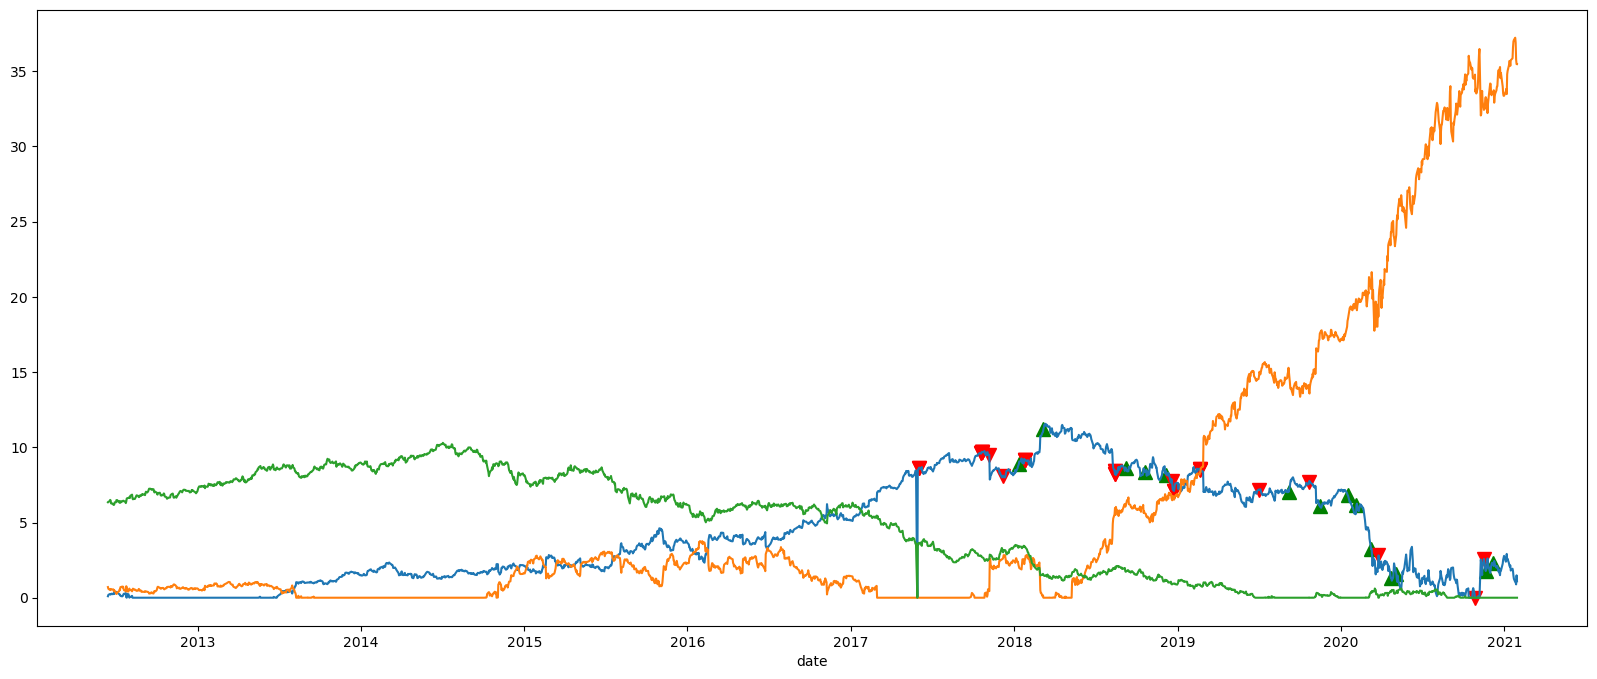

In [72]:
#  with 3 components
plt.plot(senator[senator['type'] == 'buy'].index,
         df_W_sen.loc[senator[senator['type'] == 'buy'].index,:]['C1'],  
         '^', markersize=10, color='g')
plt.plot(senator[senator['type'] == 'sell'].index,
         df_W_sen.loc[senator[senator['type'] == 'sell'].index,:]['C1'], 
         'v', markersize=10, color='r')
df_W_sen['C1'].plot(figsize=(20,8))
df_W_sen['C2'].plot(figsize=(20,8))
df_W_sen['C3'].plot(figsize=(20,8))

<AxesSubplot:xlabel='date'>

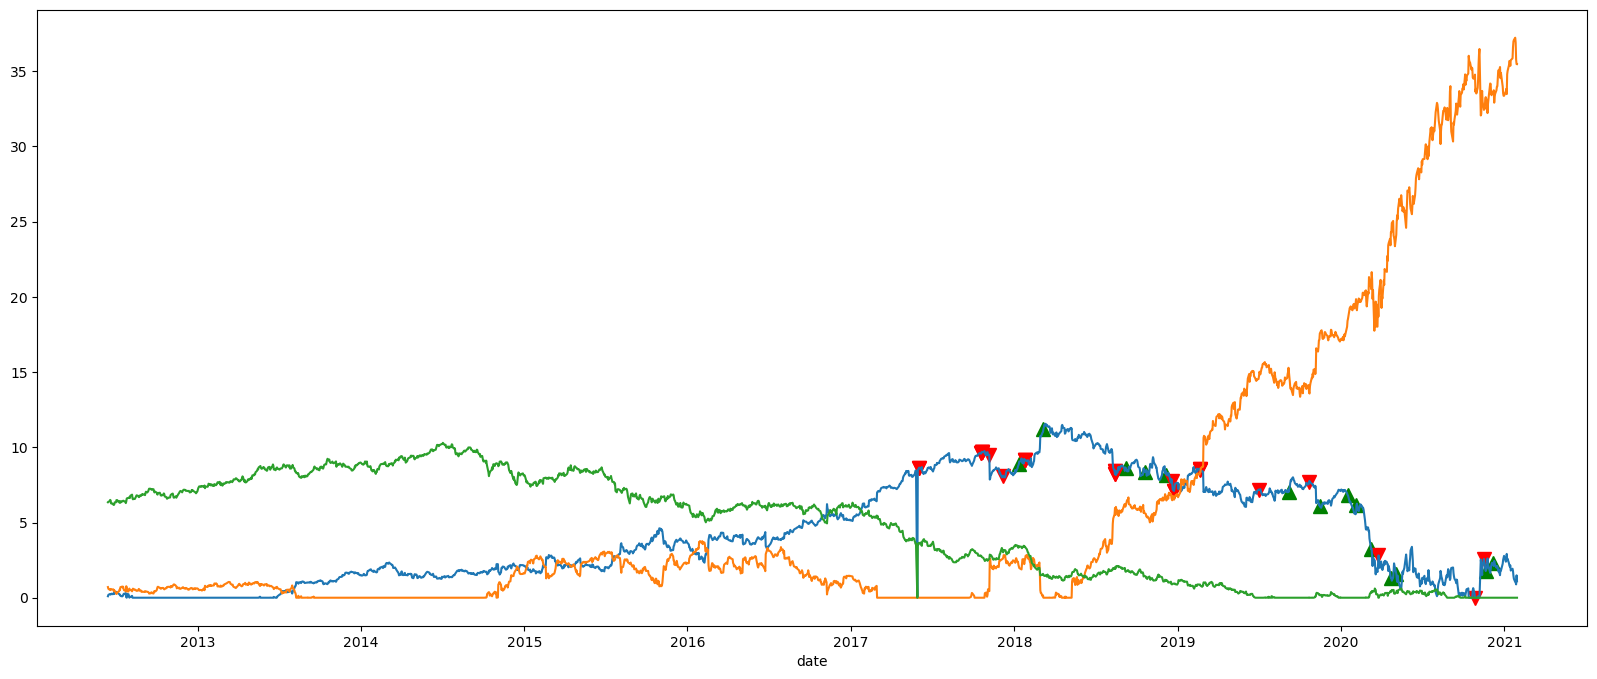

In [73]:
#  with 2 components
plt.plot(senator[senator['type'] == 'buy'].index,
         df_W_sen.loc[senator[senator['type'] == 'buy'].index,:]['C1'],  
         '^', markersize=10, color='g')
plt.plot(senator[senator['type'] == 'sell'].index,
         df_W_sen.loc[senator[senator['type'] == 'sell'].index,:]['C1'], 
         'v', markersize=10, color='r')
df_W_sen['C1'].plot(figsize=(20,8))
df_W_sen['C2'].plot(figsize=(20,8))
df_W_sen['C3'].plot(figsize=(20,8))

### Correlation with market movement

In [74]:
df

symbol,AA,AAL,AAN,AAON,AAPL,AAT,ABB,ABBV,ABT,ACA,...,WW,WY,XEL,XOM,XPO,YUM,YUMC,ZBH,ZM,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2012-06-14,19.515676,11.765413,NaN,7.983615,17.399372,17.287289,11.334119,NaN,24.302473,NaN,...,52.989738,14.045995,20.417646,53.095448,6.201161,37.871750,NaN,53.887070,NaN,NaN
2012-06-15,19.899221,11.341179,NaN,8.265536,17.478525,17.272322,11.291777,NaN,24.443270,NaN,...,51.680382,14.189320,20.502871,53.800087,6.374088,38.206841,NaN,56.171238,NaN,NaN
2012-06-18,19.605921,11.784267,NaN,8.106190,17.833187,17.511803,11.334119,NaN,24.521481,NaN,...,52.120090,14.298526,20.609396,53.728989,6.526264,38.683037,NaN,55.771294,NaN,NaN
2012-06-19,20.079712,11.972816,NaN,8.179733,17.882811,17.653988,11.630529,NaN,24.587965,NaN,...,53.800751,14.544226,20.537706,54.614651,6.578142,39.535477,NaN,56.260143,NaN,NaN
2012-06-20,20.124830,12.283922,NaN,8.093935,17.831978,17.534254,11.644645,NaN,24.568413,NaN,...,52.188488,14.496455,20.179289,54.931419,6.221912,38.935833,NaN,56.055710,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,19.156027,15.430000,20.153290,72.436684,141.224686,26.915886,28.507675,102.675369,111.556908,60.989021,...,24.969999,30.842363,63.359425,42.497265,41.329548,101.572311,57.322258,152.691071,391.829987,159.534073
2021-01-26,18.383451,15.530000,18.638660,72.861618,141.461853,26.991150,28.915064,101.095749,111.566628,59.896198,...,24.799999,30.510921,62.702007,41.563946,41.153160,102.614456,58.274845,151.646332,374.390015,157.922287
2021-01-27,18.482496,16.559999,17.374859,74.699707,140.374878,26.454899,28.251875,95.511322,111.138771,56.945602,...,24.870001,29.645493,60.805992,41.092766,39.271713,98.445824,57.027641,146.259842,370.739990,151.435715


In [76]:
df.index = pd.to_datetime(df.index)

In [77]:
senate_melted = senate[senate['ticker'] != '--']

senate_melted = senate_melted[['senator', 'ticker', 'type']]

In [78]:
dates = pd.Series(senate_melted.index)

In [79]:
senate_melted = senate_melted.reset_index()

In [80]:
# time_change = pd.DataFrame()

senate_melted['one_mos'] = dates.apply(lambda x: pd.date_range(x, periods=1, freq="BM")[0])
senate_melted['two_mos'] = dates.apply(lambda x: pd.date_range(x, periods=2, freq="BM")[1])
senate_melted['three_mos'] = dates.apply(lambda x: pd.date_range(x, periods=3, freq="BM")[2])

senate_melted['one_yr'] = dates.apply(lambda x: pd.date_range(x, periods=1, freq="BY")[0])



In [81]:
senate_melted = senate_melted.rename(columns={"trade_date": "date"})

In [82]:
df_melted = pd.melt(df.reset_index(), id_vars='date').set_index('date')

In [83]:
df_melted  = df_melted.reset_index()

In [84]:
df_melted = df_melted.sort_values(by=['date'], ignore_index=True)

In [85]:
df_melted = df_melted.rename(columns={"symbol": "ticker"})

In [86]:
df_melted

,date,ticker,value
0,2012-06-14,AA,19.515676
1,2012-06-14,CTSH,27.519222
2,2012-06-14,TWO,19.058393
3,2012-06-14,CTBI,20.971251
4,2012-06-14,CSX,6.073809
...,...,...,...
1377043,2021-01-29,OLN,23.139860
1377044,2021-01-29,OKE,35.626892
1377045,2021-01-29,OHI,30.623632
1377046,2021-01-29,OSK,89.070183


In [87]:
senate_melted

,date,senator,ticker,type,one_mos,two_mos,three_mos,one_yr
0,2012-09-13,Thomas Carper,DD,buy,2012-09-28,2012-10-31,2012-11-30,2012-12-31
1,2012-12-17,Thomas Carper,DD,buy,2012-12-31,2013-01-31,2013-02-28,2012-12-31
2,2013-03-15,Thomas Carper,DD,buy,2013-03-29,2013-04-30,2013-05-31,2013-12-31
3,2013-04-29,John Hoeven,CG,buy,2013-04-30,2013-05-31,2013-06-28,2013-12-31
4,2013-05-01,John Hoeven,KMP,buy,2013-05-31,2013-06-28,2013-07-31,2013-12-31
...,...,...,...,...,...,...,...,...
6170,2021-01-27,Patrick Toomey,SHOP,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31
6171,2021-01-27,Jerry Moran,COST,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31
6172,2021-01-27,Jerry Moran,COST,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31
6173,2021-01-28,Patrick Toomey,GME,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31


In [88]:
senate_melted = pd.merge_asof(senate_melted, 
                              df_melted, 
                              on='date', by='ticker', direction="forward").rename(columns={'value':'current'})

In [89]:
senate_melted

,date,senator,ticker,type,one_mos,two_mos,three_mos,one_yr,current
0,2012-09-13,Thomas Carper,DD,buy,2012-09-28,2012-10-31,2012-11-30,2012-12-31,33.666397
1,2012-12-17,Thomas Carper,DD,buy,2012-12-31,2013-01-31,2013-02-28,2012-12-31,34.454262
2,2013-03-15,Thomas Carper,DD,buy,2013-03-29,2013-04-30,2013-05-31,2013-12-31,36.973839
3,2013-04-29,John Hoeven,CG,buy,2013-04-30,2013-05-31,2013-06-28,2013-12-31,17.446529
4,2013-05-01,John Hoeven,KMP,buy,2013-05-31,2013-06-28,2013-07-31,2013-12-31,NaN
...,...,...,...,...,...,...,...,...,...
6170,2021-01-27,Patrick Toomey,SHOP,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31,109.208000
6171,2021-01-27,Jerry Moran,COST,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31,351.340515
6172,2021-01-27,Jerry Moran,COST,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31,351.340515
6173,2021-01-28,Patrick Toomey,GME,sell,2021-01-29,2021-02-26,2021-03-31,2021-12-31,48.400002


In [90]:
senate_melted = pd.merge_asof(senate_melted, 
              df_melted, 
              left_on='one_mos', right_on='date', 
              by='ticker', direction="forward").rename(columns={'value':'one_mos_price'}).drop(columns='date_y')

senate_melted = pd.merge_asof(senate_melted, 
              df_melted, 
              left_on='two_mos', right_on='date', 
              by='ticker', direction="forward").rename(columns={'value':'two_mos_price'}).drop(columns='date')

senate_melted = pd.merge_asof(senate_melted, 
              df_melted, 
              left_on='three_mos', right_on='date', 
              by='ticker', direction="forward").rename(columns={'value':'three_mos_price'}).drop(columns='date')

senate_melted = pd.merge_asof(senate_melted, 
              df_melted, 
              left_on='one_yr', right_on='date', 
              by='ticker', direction="forward").rename(columns={'value':'one_yr_price'}).drop(columns='date')

In [91]:
senate_melted = senate_melted.drop(columns=['one_mos', 
                                            'two_mos', 
                                            'three_mos', 
                                            'one_yr']).rename(columns={'date_x':'date'})

In [92]:
senate_melted = senate_melted.dropna()

In [93]:
senate_melted

,date,senator,ticker,type,current,one_mos_price,two_mos_price,three_mos_price,one_yr_price
0,2012-09-13,Thomas Carper,DD,buy,33.666397,31.357483,31.725624,32.689320,35.355343
1,2012-12-17,Thomas Carper,DD,buy,34.454262,35.355343,35.213177,34.688248,35.355343
2,2013-03-15,Thomas Carper,DD,buy,36.973839,34.648880,37.454369,38.061855,50.288036
3,2013-04-29,John Hoeven,CG,buy,17.446529,18.035118,16.277672,14.307151,20.107872
5,2013-06-13,Thomas Carper,DD,buy,38.271709,35.885841,39.087349,41.719929,50.288036
...,...,...,...,...,...,...,...,...,...
6091,2020-11-20,Thomas Carper,NTLA,buy,32.340000,39.270000,54.400002,62.619999,54.400002
6092,2020-11-20,Thomas Carper,FTNT,buy,23.624001,24.646000,29.705999,28.950001,29.705999
6093,2020-11-20,Thomas Carper,ATVI,buy,75.988205,78.629646,91.856590,90.026382,91.856590
6095,2020-11-24,Pat Roberts,COST,buy,369.107849,376.360870,371.441559,347.436554,371.441559


In [94]:
senate_melted['one_mos_ret'] = (senate_melted['one_mos_price'] / senate_melted['current']) - 1
senate_melted['two_mos_ret'] = (senate_melted['two_mos_price'] / senate_melted['current']) - 1
senate_melted['three_mos_ret'] = (senate_melted['three_mos_price'] / senate_melted['current']) - 1 
senate_melted['one_yr_ret'] = (senate_melted['one_yr_price'] / senate_melted['current']) - 1

In [95]:
senate_melted = senate_melted.drop(columns=['one_mos_price', 'two_mos_price', 'three_mos_price', 'one_yr_price'])

In [96]:
senate_melted

,date,senator,ticker,type,current,one_mos_ret,two_mos_ret,three_mos_ret,one_yr_ret
0,2012-09-13,Thomas Carper,DD,buy,33.666397,-0.068582,-0.057647,-0.029022,0.050167
1,2012-12-17,Thomas Carper,DD,buy,34.454262,0.026153,0.022027,0.006791,0.026153
2,2013-03-15,Thomas Carper,DD,buy,36.973839,-0.062881,0.012996,0.029427,0.360098
3,2013-04-29,John Hoeven,CG,buy,17.446529,0.033737,-0.066997,-0.179943,0.152543
5,2013-06-13,Thomas Carper,DD,buy,38.271709,-0.062340,0.021312,0.090098,0.313974
...,...,...,...,...,...,...,...,...,...
6091,2020-11-20,Thomas Carper,NTLA,buy,32.340000,0.214286,0.682127,0.936302,0.682127
6092,2020-11-20,Thomas Carper,FTNT,buy,23.624001,0.043261,0.257450,0.225449,0.257450
6093,2020-11-20,Thomas Carper,ATVI,buy,75.988205,0.034761,0.208827,0.184742,0.208827
6095,2020-11-24,Pat Roberts,COST,buy,369.107849,0.019650,0.006323,-0.058713,0.006323


In [97]:
senate_melted.groupby('senator')

<AxesSubplot:ylabel='Frequency'>

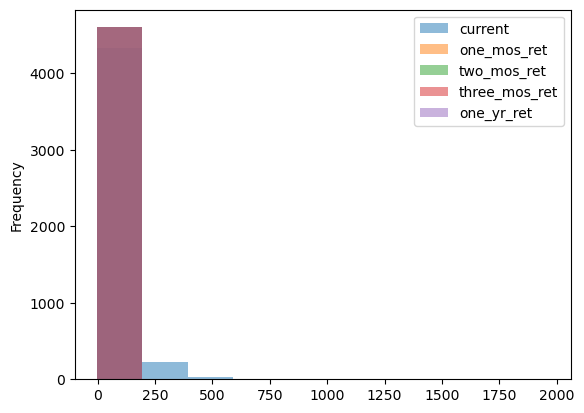

In [98]:
senate_melted.plot.hist(alpha=0.5)

In [99]:
grouped = senate_melted.groupby('senator')

In [100]:
senate_melted['senator'].unique()

array(['Thomas Carper', 'John Hoeven', 'Susan Collins',
       'Sheldon Whitehouse', 'Rafael Cruz', 'John Reed', 'Pat Roberts',
       'Cory Booker', 'Patrick Toomey', 'Maria Cantwell', 'Roy Blunt',
       'Benjamin Cardin', 'Timothy Kaine', 'David Perdue', 'Gary Peters',
       'Thomas Tillis', 'James Inhofe', 'William Cassidy',
       'Shelley Capito', 'John Cornyn', 'Michael Enzi', 'Chris VanHollen',
       'Patty Murray', 'Joseph ManchinIii', 'Tammy Duckworth',
       'Robert Casey', 'A. MitchellMcconnell', 'Mark Warner',
       'Tina Smith', 'Christopher Coons', 'Daniel Sullivan',
       'Roger Wicker', 'Jerry Moran', 'Thomas Udall', 'Jacklyn Rosen',
       'Kelly Loeffler', 'Richard Burr', 'Diane Feinstein', 'Ron Wyden'],
      dtype=object)

<AxesSubplot:ylabel='Frequency'>

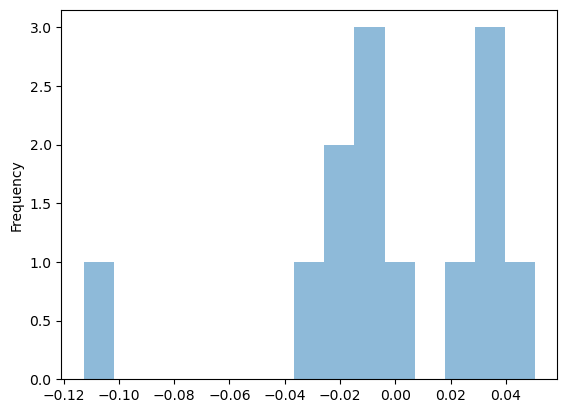

In [101]:
grouped.get_group('Tammy Duckworth')['one_mos_ret'].plot.hist(bins=15, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

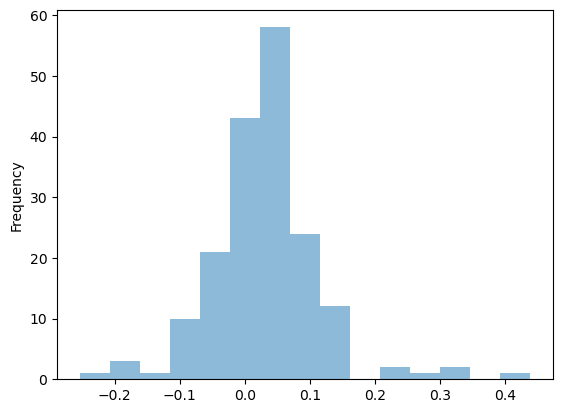

In [102]:
grouped.get_group('Ron Wyden')['one_mos_ret'].plot.hist(bins=15, alpha=0.5)

Text(0.5, 1.0, 'Active 3: Sheldon Whitehouse')

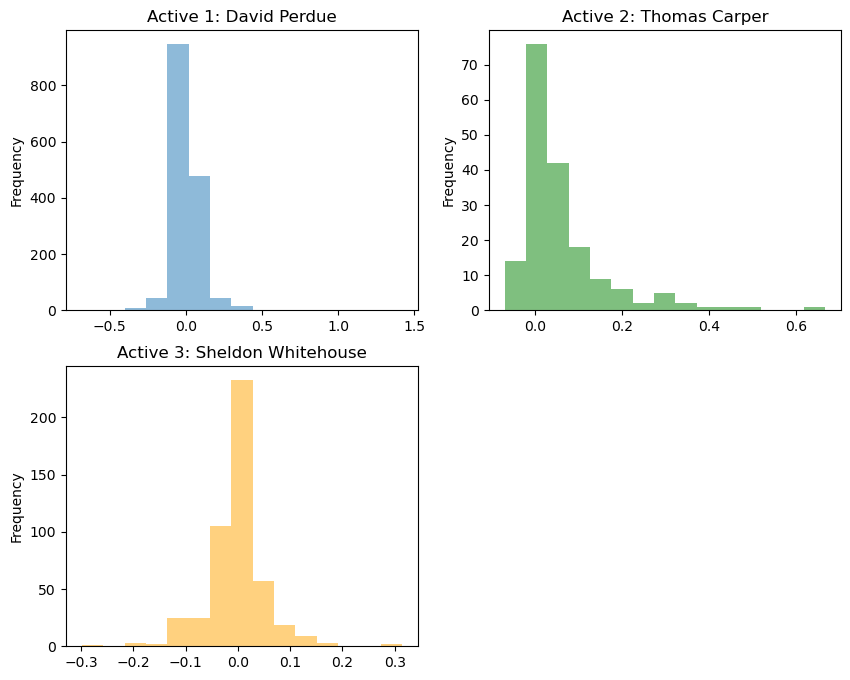

In [103]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)

grouped.get_group(active[0])['one_mos_ret'].plot.hist(bins=15, alpha=0.5)
plt.title('Active 1: ' + active[0])

plt.subplot(2, 2, 2)

grouped.get_group(active[1])['one_mos_ret'].plot.hist(bins=15, alpha=0.5, color='green')
plt.title('Active 2: ' + active[1])

plt.subplot(2, 2, 3)

grouped.get_group(active[2])['one_mos_ret'].plot.hist(bins=15, alpha=0.5, color='orange')
plt.title('Active 3: ' + active[2])

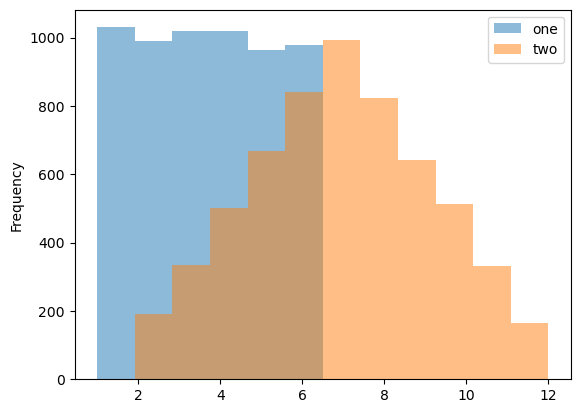

In [104]:
df = pd.DataFrame(
    np.random.randint(1, 7, 6000),
    columns = ['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
ax = df.plot.hist(bins=12, alpha=0.5)

# Time Series

- Compare Sharpe ratios, returns (choose a metric!!) of senator efficient portfolio to index funds’ (this might be blocked by asset allocation task)
- How does seasonality affect time series?
- Correlation analysis


In [111]:
risk_free = getYahooData('^FVX', min(etfs.index), max(etfs.index))['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [113]:
etfs

,SPY,VTI,QQQ,VTV,VUG,SCHD,DIA
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,
2012-09-13,120.801216,62.222290,63.096249,46.078659,65.637917,21.328144,108.499702
2012-09-14,121.336876,62.553680,63.658657,46.201717,66.065613,21.350096,108.876419
2012-09-17,120.924820,62.296856,63.685860,45.940208,65.931976,21.333881,108.611977
2012-09-18,120.825897,62.189144,63.740303,45.878677,65.887413,21.341253,108.676086
2012-09-19,120.891846,62.238865,63.858185,45.917130,65.985428,21.333881,108.772232
...,...,...,...,...,...,...,...
2021-01-22,373.518768,196.037048,322.260223,116.883484,257.315491,62.171146,299.740479
2021-01-25,374.991852,196.593292,324.924042,116.883484,258.969269,62.284668,299.430939


In [124]:
etfs['SPY']['Adj Close']

Date
2012-09-13    120.801216
2012-09-14    121.336876
2012-09-17    120.924820
2012-09-18    120.825897
2012-09-19    120.891846
                 ...    
2021-01-22    373.518768
2021-01-25    374.991852
2021-01-26    374.406525
2021-01-27    365.255859
2021-01-28    368.397095
Name: Adj Close, Length: 2107, dtype: float64

0.01049677051907488

In [133]:
(100 * etfs['SPY']['Adj Close'].pct_change() - risk_free) / np.std(etfs['SPY']['Adj Close'].pct_change()*100, ddof=0)

Date
2012-09-13         NaN
2012-09-14   -0.258725
2012-09-17   -1.006592
2012-09-18   -0.743853
2012-09-19   -0.604394
                ...   
2021-01-22   -0.750664
2021-01-25   -0.014881
2021-01-26   -0.541205
2021-01-27   -2.716117
2021-01-28         NaN
Name: Adj Close, Length: 2107, dtype: float64

In [120]:
risk_free

Date
2012-09-13    0.654
2012-09-14    0.715
2012-09-17    0.717
2012-09-18    0.699
2012-09-19    0.689
              ...  
2021-01-21    0.447
2021-01-22    0.434
2021-01-25    0.410
2021-01-26    0.412
2021-01-27    0.407
Name: Adj Close, Length: 2104, dtype: float64

In [117]:
etfs['SPY']['Adj Close'] - risk_free
etfs['SPY']['Adj Close'] - risk_free
etfs['SPY']['Adj Close'] - risk_free

Date
2012-09-13    0.654
2012-09-14    0.715
2012-09-17    0.717
2012-09-18    0.699
2012-09-19    0.689
              ...  
2021-01-21    0.447
2021-01-22    0.434
2021-01-25    0.410
2021-01-26    0.412
2021-01-27    0.407
Name: Adj Close, Length: 2104, dtype: float64

In [116]:
etfs['SPY'] - risk_free

,2012-09-13 00:00:00,2012-09-14 00:00:00,2012-09-17 00:00:00,2012-09-18 00:00:00,2012-09-19 00:00:00,2012-09-20 00:00:00,2012-09-21 00:00:00,2012-09-24 00:00:00,2012-09-25 00:00:00,2012-09-26 00:00:00,...,2021-01-14 00:00:00,2021-01-15 00:00:00,2021-01-19 00:00:00,2021-01-20 00:00:00,2021-01-21 00:00:00,2021-01-22 00:00:00,2021-01-25 00:00:00,2021-01-26 00:00:00,2021-01-27 00:00:00,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
sectors

,XLV,VGT,XLF
,Adj Close,Adj Close,Adj Close
Date,,,
2012-09-13,33.651646,67.129982,10.803327
2012-09-14,33.516460,67.784508,10.890290
2012-09-17,33.710789,67.703827,10.789942
2012-09-18,33.820618,67.703827,10.736432
2012-09-19,33.854420,67.641068,10.729743
...,...,...,...
2021-01-22,114.570007,359.025299,29.386150
2021-01-25,115.320236,361.443207,29.173071
